In [13]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from rdkit import Chem
from serenityff.charge.tree.dash_tree import DASHTree
import time
import os
from matplotlib import pyplot as plt

In [18]:
# set matplotlib font size
plt.rcParams.update({'font.size': 14})

In [2]:
folder_aa = "/localhome/mlehner/dash_data/test144_aa/outs/"
sdf_aa_file_path = f"{folder_aa}/../all_aa.sdf"

In [3]:
mol_sup_aa = Chem.SDMolSupplier(sdf_aa_file_path, removeHs=False)

In [4]:
tree = DASHTree()

Loading DASH tree data
Loaded 122 trees and data


In [7]:
def calc_molSup_pcharge():
    for mol in mol_sup_aa:
        tree.get_molecules_partial_charges(mol)

In [28]:
%timeit -n 10 calc_molSup_pcharge()

325 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


all following data is from the previous publication (M. T. Lehner et al. DASH: Dynamic Attention-Based Substructure Hierarchy for Partial Charge Assignment. J. Chem. Inf. Model, 63(19), (2023) 6014-6028)

In [10]:
dash_old=3.9e0

In [32]:
mmff = 1.0e-2
gasteiger = 2.5e-2
dash = 3.25e-1
gnn = 1.0e0
am1_bcc = 1.9e2
mbis = 8.5e3
resp = 1.1e4

In [33]:
all_times = {"MMFF": mmff, "Gasteiger": gasteiger, "DASH": dash, "GNN": gnn, "AM1-BCC": am1_bcc, "MBIS": mbis, "RESP": resp}

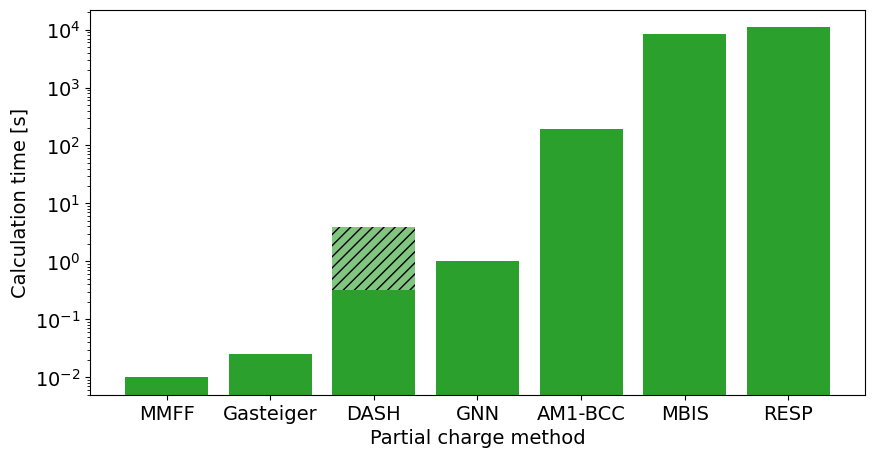

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(all_times.keys(), all_times.values(), color="C2")
ax.set_ylabel("Calculation time [s]")
ax.set_yscale("log")
# add shaded bar for old DASH
ax.bar("DASH", dash_old, color="C2", alpha=0.6, zorder=0, hatch="///")
ax.set_xlabel("Partial charge method")
fig.savefig("test_172_comp_time_newTree.pdf", bbox_inches="tight")
fig.savefig("test_172_comp_time_newTree.svg", bbox_inches="tight")